# Analysis of User Country
In this workbook, information about the users' country is analysed. 

Two dataframes are made, the first one is **country_list**:

***Index***: the country names in lowercase
* **User-ID**: list of users in country
* **All-Ratings**: list of all ratings made from that country
* **Mean-Rating**: the mean rating from that country
* **User-Number**: number of users in that country

The second is **important_countries**:

This has the same layout as country_list but only contains the top 8 countries. There is an extra row called ***other*** which contains the data from the remaining countries.
Note: the User-ID and All-Ratings is blank for the ***other*** row.


In [2]:
import pandas as pd
import numpy as np

#Read in cleaned data sets
users = pd.read_csv('BX-Users-Clean.csv')
user_ratings = pd.read_csv('BX-Ratings-Clean.csv')

#Creates data frame with an index of the country names and a column with a list of all user 
#IDs in that country
country_list = pd.DataFrame(users.groupby('User-Country')['User-ID'].apply(list))

#Creates a column of lists where the list contains all the rating coming out of that country
country_list['All-Ratings'] = np.empty((len(country_list), 0)).tolist()
for i in country_list.index:
    for j in country_list.loc[i, 'User-ID']:
        if (j in user_ratings.index):
            country_list.loc[i, 'All-Ratings'].append(user_ratings.loc[j, 'Book-Rating'])

#Adds a column of rating means and number of users           
country_list['Mean-Rating'] = country_list['All-Ratings'].apply(np.mean)
country_list['User-Number'] = country_list['User-ID'].apply(len)
country_list

/usr/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


,User-ID,All-Ratings,Mean-Rating,User-Number
User-Country,,,,
afghanistan,"[56235, 161968]","[7, 8]",7.500000,2
albania,[143435],[8],8.000000,1
algeria,[37984],[5],5.000000,1
angola,[275270],[],NaN,1
antigua barbuda,[41231],[10],10.000000,1
...,...,...,...,...
uruguay,"[22858, 35006, 53783]","[6, 8, 9]",7.666667,3
venezuela,"[108480, 189557, 268309]","[7, 5]",6.000000,3
vietnam,[52497],[6],6.000000,1


Text(0.5, 1.0, 'Mean Rating Score By Country')

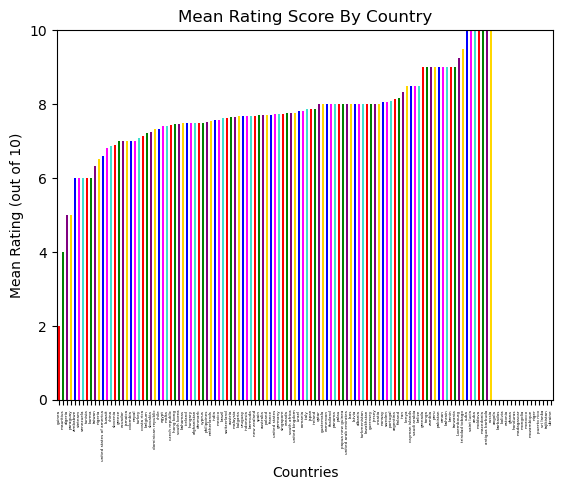

In [7]:
import matplotlib.pyplot as plt
colours = ['red', 'green', 'purple', 'gold', 'blue', 'magenta', 'turquoise']

#Sorts countries by their mean rating in ascending order so the graph is more clear
ax = country_list.sort_values('Mean-Rating', ascending = True)

#Creates bar chart of mean rating versus country
ax1 = ax.plot.bar(y='Mean-Rating', legend = None, color = colours, rot=0)
plt.xticks(rotation = 'vertical', fontsize = 3)
plt.ylabel('Mean Rating (out of 10)')
plt.xlabel('Countries')
plt.ylim((0,10))
plt.title("Mean Rating Score By Country")

In [4]:
#Creates a single row data frame containing collective information about countries with less than 300 users
bottom = country_list.loc[country_list['User-Number'] < 300]
bottom_countries = pd.DataFrame({'User-ID': [0], 'All-Ratings': [0], 'Mean-Rating': bottom['Mean-Rating'].mean(), 'User-Number': sum(bottom['User-Number'])}, index = ['other'])

#Takes the countries with more than 300 users (Top 8 Countries with Most Users) and adds this on top of previous data DataFrame
top_countries = country_list.loc[country_list['User-Number'] > 300]
important_countries = pd.concat([top_countries, bottom_countries])
important_countries

,User-ID,All-Ratings,Mean-Rating,User-Number
australia,"[1133, 1424, 1486, 1996, 2199, 2414, 3032, 453...","[5, 7, 9, 10, 8, 10, 7, 8, 9, 8, 7, 6, 7, 9, 4...",7.701754,980
canada,"[8, 69, 107, 202, 362, 494, 620, 640, 938, 104...","[10, 6, 10, 10, 10, 8, 8, 6, 8, 7, 9, 9, 5, 10...",7.746500,4608
france,"[625, 643, 1166, 1211, 1442, 1846, 2224, 2549,...","[8, 7, 7, 7, 10, 5, 2, 10, 9, 8, 8, 8, 9, 10, ...",7.715232,396
germany,"[242, 372, 628, 758, 850, 899, 1178, 1214, 133...","[10, 10, 9, 9, 8, 7, 10, 8, 9, 10, 6, 7, 7, 8,...",7.722097,1862
italy,"[460, 2685, 2738, 2996, 3017, 3251, 3816, 4334...","[3, 10, 8, 9, 10, 8, 7, 7, 9, 9, 4, 7, 9, 9, 9...",7.854839,422
spain,"[337, 361, 1234, 1696, 2084, 2416, 2515, 2789,...","[9, 10, 7, 4, 10, 10, 8, 9, 6, 5, 7, 8, 10, 4,...",7.693443,783
united kingdom,"[85, 713, 896, 901, 913, 1025, 1057, 1281, 134...","[9, 7, 9, 8, 8, 8, 8, 6, 8, 10, 9, 9, 10, 8, 5...",7.759174,1775
united states,"[9, 16, 17, 26, 32, 39, 42, 44, 51, 53, 56, 73...","[5, 9, 8, 10, 7, 9, 10, 10, 9, 8, 8, 10, 6, 6,...",7.718266,34472
other,0,0,7.729919,2264


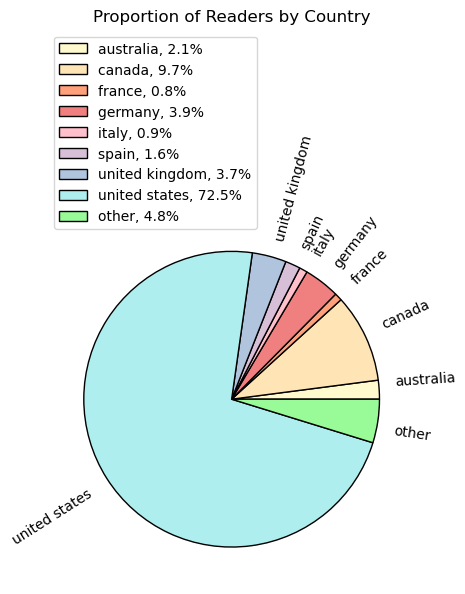

In [5]:
colours = ['lemonchiffon', 'moccasin', 'lightsalmon', 'lightcoral', 'pink', 'thistle', 'lightsteelblue', 'paleturquoise', 'palegreen']

#Creates pie chart showing the countries by their amoutn of users
plt.pie(important_countries['User-Number'], labels = important_countries.index, colors = colours, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'black' }, rotatelabels = True)
plt.title("Proportion of Readers by Country", y = 1.5)

#Creates a legend containing the country name and their percentage
total = important_countries['User-Number'].sum()
labels = [f'{l}, {100 * s / total:.1f}%' for l, s in zip(important_countries.index, important_countries['User-Number'])]
plt.legend(bbox_to_anchor=(0, 1.5), loc='upper left', labels=labels)